### PROBLEM STATEMENT

### Driver's drowsiness is the serious issue. It causes major accidents. The alarm is used to alert the driver so that accidents could be reduced

### IMPORT NECESSARY PACKAGES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

### LOADING THE IMAGE

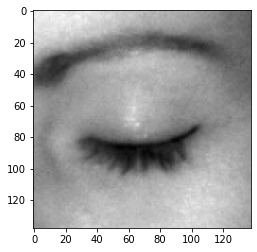

In [2]:
img_array = cv2.imread("test/Closed_Eyes/s0016_00224_1_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap='gray')

In [3]:
img_array.shape

(138, 138)

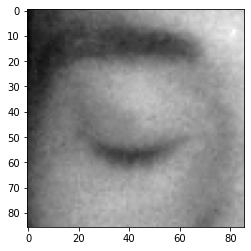

In [4]:
import os
directory = "train/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(directory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgh = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break   

### CONVERTING INTO ARRAY AS DATA AND LABELS

In [40]:
#FOR TRAINING DATA
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
directory = "train/"
Classes = ["Closed_Eyes", "Open_Eyes"]

print("images getting loaded")

data = []
labels = []

for category in Classes:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

images getting loaded


In [41]:
#FOR TESTING DATA
directory_test = "test/"
testX = []
testY = []
for category in Classes:
    path = os.path.join(directory_test, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        testX.append(image)
        testY.append(category)

In [42]:
print(len(data))
print(len(labels))
print(len(testX))
print(len(testY))


4000
4000
976
976


In [43]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

In [44]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)



data = np.array(data, dtype="float32")
labels = np.array(labels)


In [10]:
testY = lb.fit_transform(testY)
testY = to_categorical(testY)

testX = np.array(testX, dtype="float32")
testY = np.array(testY)

### SPLITTING THE DATA

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(trainX, validX, trainY, validY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=0)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")


In [12]:
validX

array([[[[-0.5921569 , -0.5921569 , -0.5921569 ],
         [-0.5921569 , -0.5921569 , -0.5921569 ],
         [-0.5921569 , -0.5921569 , -0.5921569 ],
         ...,
         [-0.2862745 , -0.2862745 , -0.2862745 ],
         [-0.2862745 , -0.2862745 , -0.2862745 ],
         [-0.2862745 , -0.2862745 , -0.2862745 ]],

        [[-0.5921569 , -0.5921569 , -0.5921569 ],
         [-0.5921569 , -0.5921569 , -0.5921569 ],
         [-0.5921569 , -0.5921569 , -0.5921569 ],
         ...,
         [-0.2862745 , -0.2862745 , -0.2862745 ],
         [-0.2862745 , -0.2862745 , -0.2862745 ],
         [-0.2862745 , -0.2862745 , -0.2862745 ]],

        [[-0.6       , -0.6       , -0.6       ],
         [-0.6       , -0.6       , -0.6       ],
         [-0.60784316, -0.60784316, -0.60784316],
         ...,
         [-0.29411763, -0.29411763, -0.29411763],
         [-0.29411763, -0.29411763, -0.29411763],
         [-0.29411763, -0.29411763, -0.29411763]],

        ...,

        [[-0.4823529 , -0.4823529 , -0

In [13]:
validY

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [14]:
#SAVING BEST MODEL
from keras.callbacks import ModelCheckpoint
model_path = r'C:\Users\VENKATARAMAN S R\Downloads\CAPSTONE PROJECT- drowsiness detection\newmodelepoch7.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

### BUILDING THE MODEL

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report



baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))


In [16]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [17]:
len(baseModel.layers)

154

In [18]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

### CONSTRUCTING HEAD OF THE MODEL

In [19]:
INIT_LR = 1e-4 #INITIAL LEARNING RATE
EPOCHS = 5
BS = 29 #BATCH SIZE

In [20]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)


for layer in baseModel.layers[:65]:
    layer.trainable = False
for layer in baseModel.layers[65:]:
    layer.trainable = True
# compile our model
print("compiling model")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

# train the head of the network
print("training head")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(validX, validY),
    validation_steps=len(validX) // BS,
    epochs=EPOCHS)

compiling model
training head


D:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
110/110 [==============================] - 226s 2s/step - loss: 0.0938 - accuracy: 0.9738 - val_loss: 0.2009 - val_accuracy: 0.8925
Epoch 2/5
110/110 [==============================] - 241s 2s/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.1221 - val_accuracy: 0.9538
Epoch 3/5
110/110 [==============================] - 177s 2s/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4/5
110/110 [==============================] - 176s 2s/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0085 - val_accuracy: 0.9975
Epoch 5/5
110/110 [==============================] - 187s 2s/step - loss: 9.4222e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.9987


In [21]:
model.save(r'C:\Users\VENKATARAMAN S R\Downloads\CAPSTONE PROJECT- drowsiness detection\newmodelepoch7.h5')

### PREDICTION

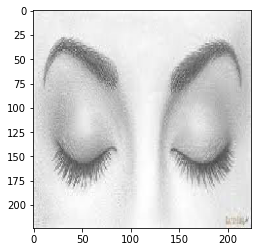

[[0.92169905 0.09967548]]
[0]
Closed


In [22]:
path = r"C:\Users\VENKATARAMAN S R\Downloads\CAPSTONE PROJECT- drowsiness detection\download (3).jpeg"

image = load_img(path, target_size=(224, 224))
plt.imshow(image)
plt.show()
image = img_to_array(image)
image = np.expand_dims(image, axis = 0)

imge = preprocess_input(image)
    
prediction = model.predict(image,BS)
print(prediction)
i = 0
#predIdxs = model.predict(image, batch_size=BS)
predIdxs = np.argmax(prediction, axis=1)
print(predIdxs)
if predIdxs == 0 :
    prediction_class = 'Closed'

else :
    prediction_class = 'Open'

print(prediction_class)

In [23]:
import tensorflow as tf

In [24]:
model = tf.keras.models.load_model(r'C:\Users\VENKATARAMAN S R\Downloads\CAPSTONE PROJECT- drowsiness detection\newmodelepoch7.h5')

### REAL TIME PREDICTION

In [47]:
import cv2
font=cv2.FONT_HERSHEY_SIMPLEX
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_eye.xml")
lefteye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_lefteye_2splits.xml")
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame=cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray, 1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[int(y):int(y) + h, int((x+w)/2):x + w]
        roi_color = frame[y:y + h, int((x+w)/2):x + w]
        eye = 0
        openEye = 0
        counter = 0
        openEyes = eye_cascade.detectMultiScale(roi_gray)
        AllEyes = lefteye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in openEyes:
            openEye += 1
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0),2)
        for (ex, ey, ew, eh) in AllEyes:
            eye += 1
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 40),2)
        if (openEye < eye):
            cv2.putText(frame,"Eyes are closed",(x,y),font,1,(0,0,255),2,cv2.LINE_4);
    cv2.imshow('DROWSINESS DETECTION', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### REAL TIME PREDICTION WITH ALARM

In [48]:
import winsound
frequency = 2500
duration = 1500
import cv2
font=cv2.FONT_HERSHEY_SIMPLEX
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_eye.xml")
lefteye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_lefteye_2splits.xml")
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame=cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray, 1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[int(y):int(y) + h, int((x+w)/2):x + w]
        roi_color = frame[y:y + h, int((x+w)/2):x + w]
        eye = 0
        openEye = 0
        counter = 0
        openEyes = eye_cascade.detectMultiScale(roi_gray)
        AllEyes = lefteye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in openEyes:
            openEye += 1
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0),2)
        for (ex, ey, ew, eh) in AllEyes:
            eye += 1
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 40),2)
        if (openEye < eye):
            cv2.putText(frame,"Eyes are closed-DROWSY",(x,y),font,1,(0,0,255),2,cv2.LINE_4);
            winsound.Beep(frequency, duration)
    cv2.imshow('DROWSINESS DETECTION', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [27]:
!pip install streamlit


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### DEPLOYMENT

In [36]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model(r'C:\Users\VENKATARAMAN S R\Downloads\CAPSTONE PROJECT- drowsiness detection\newmodelepoch7.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Drowsiness Detection
         """
         )

file = st.file_uploader("Please upload a file", type=["jpg", "png","jpeg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, width= 500)
    predictions = import_and_predict(image, model)
   
    predIdxs = np.argmax(predictions, axis=1)
    print(predIdxs)
    if predIdxs == 0 :
        st.title("Eyes are closed")

    else :
        st.title("Eyes are open")



Overwriting app.py
